# <center>Fruit Classification</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-Data-From-Kaggle" data-toc-modified-id="Load-Data-From-Kaggle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data From Kaggle</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Build-Alexnet-Architecture" data-toc-modified-id="Build-Alexnet-Architecture-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build Alexnet Architecture</a></span></li><li><span><a href="#Use-Test-Set-to-Evaluate-The-Model" data-toc-modified-id="Use-Test-Set-to-Evaluate-The-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Use Test Set to Evaluate The Model</a></span><ul class="toc-item"><li><span><a href="#Visualize-test-prediction" data-toc-modified-id="Visualize-test-prediction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Visualize test prediction</a></span></li><li><span><a href="#Visualize-with-number" data-toc-modified-id="Visualize-with-number-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Visualize with number</a></span></li><li><span><a href="#classification_report" data-toc-modified-id="classification_report-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>classification_report</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Problem" data-toc-modified-id="Problem-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Problem</a></span></li></ul></li></ul></div>

## Introduction

The [Fruit360 data](https://www.kaggle.com/moltean/fruits) is available at kaggle. 

The dataset is utilized in this project with Deep Learning to predict kind of fruit as the given image. 

- Explore the data, check none data.
- Process data to make it eaiser and suitable for the algorithm before going to train it.
- Use CNN to extract feature of images.
- Use classification_report to evaluate the model.





## Load Data From Kaggle

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
!pip install -q kaggle


In [10]:
 !ls -a

.  ..  .config	.kaggle  sample_data


In [11]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


In [12]:
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [13]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Dec  1 00:47 kaggle.json


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02          11194  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          16487  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          13495  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           6735  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                 

In [0]:
!kaggle datasets list -s "Fruits 360"



ref                                     title                      size  lastUpdated          downloadCount  
--------------------------------------  ------------------------  -----  -------------------  -------------  
moltean/fruits                          Fruits 360                734MB  2019-11-04 21:16:32          30860  
overwatch5601/apple-similarity-dataset  Apple Similarity Dataset    7MB  2019-08-12 21:11:20             48  
ztaihong/fruits360v14                   fruits360v14              175MB  2019-10-02 06:09:08             37  
ztaihong/fruits360v14npz                fruits360v14npz             1GB  2019-10-08 03:04:59              5  
ashleshaprix/fruit-360-data             fruit 360 data            408MB  2019-08-30 11:00:24             24  
debajyotisaha8221/fruits                fruits                    408MB  2019-11-01 09:59:51              3  
hsonnl/fruitsdemoooo                    FruitsDemoooo             514MB  2019-10-03 00:13:20              3  


In [15]:
!kaggle datasets download -d moltean/fruits 

 99% 729M/734M [00:06<00:00, 101MB/s]
100% 734M/734M [00:06<00:00, 123MB/s]


In [16]:
!ls -a

.  ..  .config	fruits.zip  .kaggle  kaggle.json  sample_data


In [17]:
!unzip fruits.zip

Archive:  fruits.zip
  inflating: fruits-360_dataset/fruits-360/LICENSE  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/321_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/322_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/323_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/324_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/325_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/326_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/327_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/32_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/33_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/34_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/35_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Test/Apple Braeburn/36_100.jpg  
  infla

In [18]:
!ls -a

.   .config		fruits.zip  kaggle.json
..  fruits-360_dataset	.kaggle     sample_data


In [19]:
cd fruits-360_dataset/

/content/fruits-360_dataset


In [20]:
cd fruits-360/

/content/fruits-360_dataset/fruits-360


In [21]:
ls


LICENSE  papers/  readme.md  Test/  test-multiple_fruits/  Training/


In [22]:
pwd

'/content/fruits-360_dataset/fruits-360'

## Data Exploration

Import Libraries

In [23]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


The data provides 2 data set, the first one is training and another is test

Because the ram in google colab cannot load all data, so this projet will load the training data first after that remove it and load the test data to evalute the model.

In [24]:
train_dir = '/content/fruits-360_dataset/fruits-360/Training'
test_dir = '/content/fruits-360_dataset/fruits-360/Test'
random_seed = 42

categories = os.listdir(train_dir)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))


List of categories =  ['Strawberry', 'Nectarine', 'Apple Braeburn', 'Pomelo Sweetie', 'Apricot', 'Quince', 'Lemon Meyer', 'Passion Fruit', 'Banana', 'Pineapple', 'Grape Pink', 'Plum', 'Cauliflower', 'Kumquats', 'Grape White 2', 'Guava', 'Mandarine', 'Avocado', 'Plum 3', 'Apple Granny Smith', 'Grapefruit White', 'Ginger Root', 'Raspberry', 'Kohlrabi', 'Chestnut', 'Tangelo', 'Apple Crimson Snow', 'Peach', 'Eggplant', 'Tomato Yellow', 'Pitahaya Red', 'Cherry Wax Yellow', 'Strawberry Wedge', 'Plum 2', 'Potato White', 'Salak', 'Kiwi', 'Lemon', 'Apple Red Yellow 1', 'Pear Abate', 'Pear Monster', 'Tomato 3', 'Pepino', 'Limes', 'Cherry 1', 'Peach 2', 'Physalis', 'Pear Kaiser', 'Apple Red Yellow 2', 'Grape White 3', 'Tomato 4', 'Rambutan', 'Redcurrant', 'Potato Sweet', 'Dates', 'Potato Red', 'Pear Williams', 'Tamarillo', 'Peach Flat', 'Tomato Maroon', 'Onion Red', 'Cantaloupe 2', 'Tomato 2', 'Grape Blue', 'Mulberry', 'Papaya', 'Physalis with Husk', 'Cactus fruit', 'Grape White', 'Orange', 'Coco

**=> There 120 categories of fruits**

In [0]:
labeDict = {}
for idx, name in enumerate(categories):
    labeDict.update( { idx : name} )


In [26]:
labeDict[1]

'Nectarine'

In [29]:
categories

['Strawberry',
 'Nectarine',
 'Apple Braeburn',
 'Pomelo Sweetie',
 'Apricot',
 'Quince',
 'Lemon Meyer',
 'Passion Fruit',
 'Banana',
 'Pineapple',
 'Grape Pink',
 'Plum',
 'Cauliflower',
 'Kumquats',
 'Grape White 2',
 'Guava',
 'Mandarine',
 'Avocado',
 'Plum 3',
 'Apple Granny Smith',
 'Grapefruit White',
 'Ginger Root',
 'Raspberry',
 'Kohlrabi',
 'Chestnut',
 'Tangelo',
 'Apple Crimson Snow',
 'Peach',
 'Eggplant',
 'Tomato Yellow',
 'Pitahaya Red',
 'Cherry Wax Yellow',
 'Strawberry Wedge',
 'Plum 2',
 'Potato White',
 'Salak',
 'Kiwi',
 'Lemon',
 'Apple Red Yellow 1',
 'Pear Abate',
 'Pear Monster',
 'Tomato 3',
 'Pepino',
 'Limes',
 'Cherry 1',
 'Peach 2',
 'Physalis',
 'Pear Kaiser',
 'Apple Red Yellow 2',
 'Grape White 3',
 'Tomato 4',
 'Rambutan',
 'Redcurrant',
 'Potato Sweet',
 'Dates',
 'Potato Red',
 'Pear Williams',
 'Tamarillo',
 'Peach Flat',
 'Tomato Maroon',
 'Onion Red',
 'Cantaloupe 2',
 'Tomato 2',
 'Grape Blue',
 'Mulberry',
 'Papaya',
 'Physalis with Husk',
 '

In [30]:
len(categories)

120

In [151]:
dataDic = {}
for i in categories:
  dataDic.update({ i : len(os.listdir(train_dir+"/"+i)) })
dataDic

{'Apple Braeburn': 492,
 'Apple Crimson Snow': 444,
 'Apple Golden 1': 492,
 'Apple Golden 2': 492,
 'Apple Golden 3': 481,
 'Apple Granny Smith': 492,
 'Apple Pink Lady': 456,
 'Apple Red 1': 492,
 'Apple Red 2': 492,
 'Apple Red 3': 429,
 'Apple Red Delicious': 490,
 'Apple Red Yellow 1': 492,
 'Apple Red Yellow 2': 672,
 'Apricot': 492,
 'Avocado': 427,
 'Avocado ripe': 491,
 'Banana': 490,
 'Banana Lady Finger': 450,
 'Banana Red': 490,
 'Beetroot': 450,
 'Blueberry': 462,
 'Cactus fruit': 490,
 'Cantaloupe 1': 492,
 'Cantaloupe 2': 492,
 'Carambula': 490,
 'Cauliflower': 702,
 'Cherry 1': 492,
 'Cherry 2': 738,
 'Cherry Rainier': 738,
 'Cherry Wax Black': 492,
 'Cherry Wax Red': 492,
 'Cherry Wax Yellow': 492,
 'Chestnut': 450,
 'Clementine': 490,
 'Cocos': 490,
 'Dates': 490,
 'Eggplant': 468,
 'Ginger Root': 99,
 'Granadilla': 490,
 'Grape Blue': 984,
 'Grape Pink': 492,
 'Grape White': 490,
 'Grape White 2': 490,
 'Grape White 3': 492,
 'Grape White 4': 471,
 'Grapefruit Pink':

In [0]:
'''Data Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette() #  This function provides an interface to many 
#(though not all) of the possible ways you can generate colors in seaborn

import pandas as pd

Now, the project will show the distribution of each class in the data

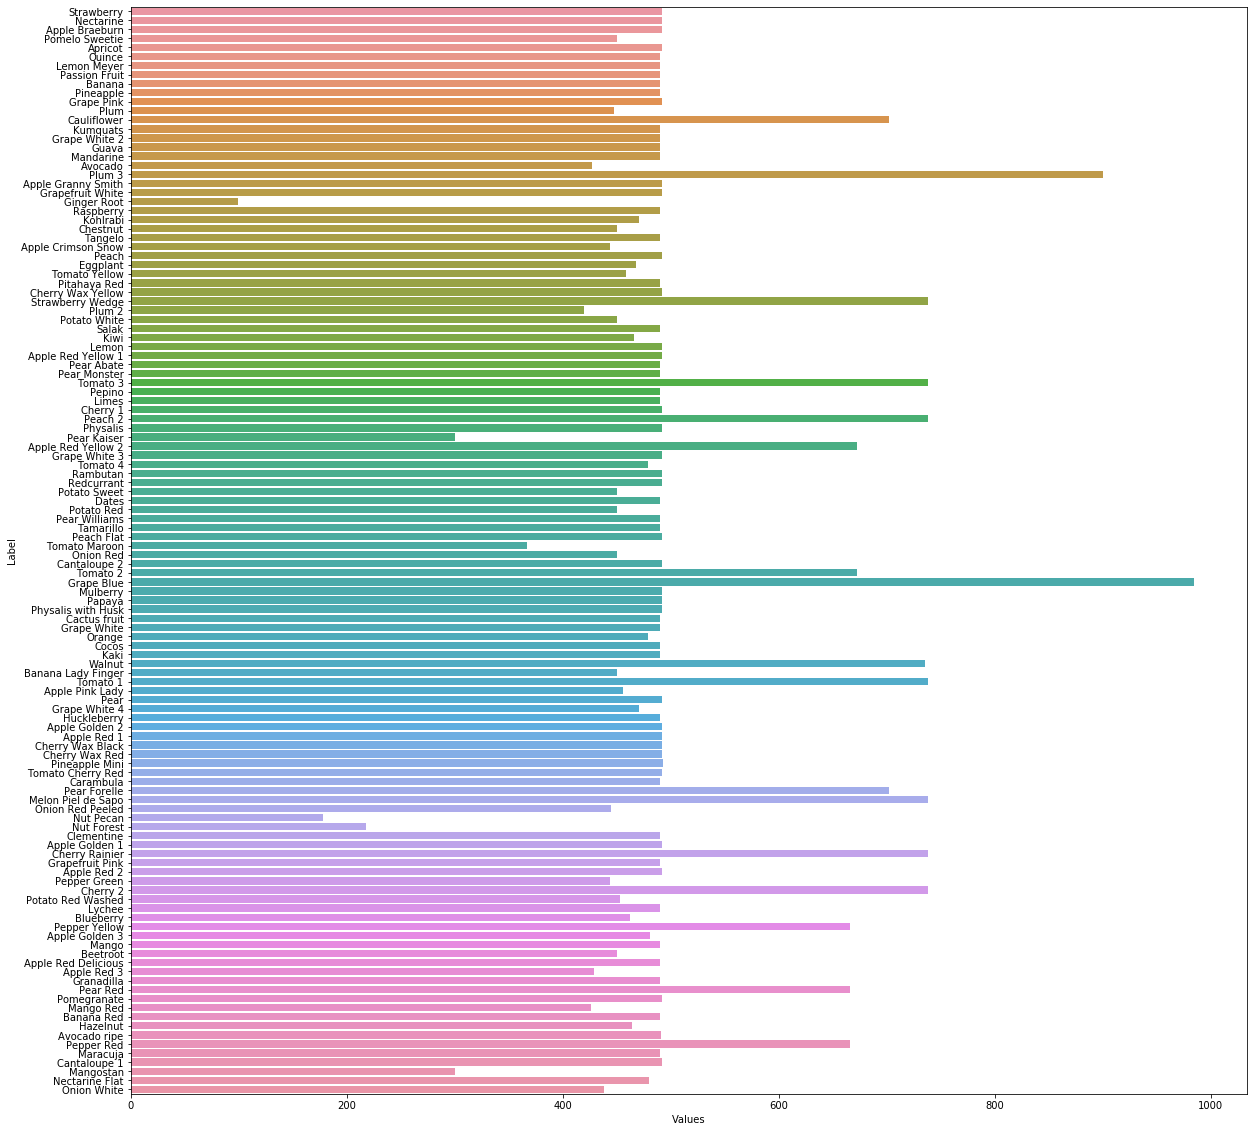

In [152]:
data  = pd.DataFrame( data = dataDic.keys(), columns=['Label'] )
data['Values'] = dataDic.values()
plt.figure(figsize=(20,20))
sns.barplot(x='Values', y= 'Label',data=data)


In [169]:
data[data['Values'] == data.Values.max()]

Label  Values
63  Grape Blue     984

In [170]:
data[data['Values'] == data.Values.min()]

Label  Values
21  Ginger Root      99

**From the graph it shows that the min number of images is 99 belonging to Ginger Root, while the max is Grape Blue with 984**

In [27]:
def load_images_and_labels(categories, dire, perInf):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        trunk = np.array(os.listdir(dire+"/"+category))
        #trunk = trunk[n]
        for image_name in trunk:
            img = cv2.imread(dire+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories, train_dir, 0.15)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  60498 
No. of labels loaded =  60498
<class 'list'> <class 'list'>


**The total samples are 60498**

**Now, each image is resized to 227x227 inorder to fit with AlexNet and then they are converted to matrix form**

In [129]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (60498, 227, 227, 3) 
Labels shape =  (60498,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Show several images in the data

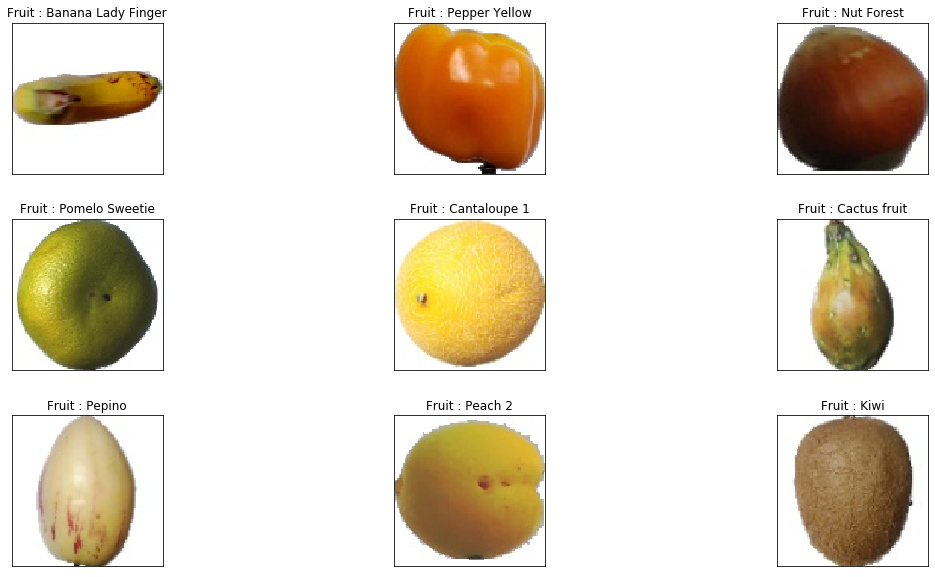

In [131]:
def display_rand_images(images, labels, dict):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Fruit : {}'.format( labeDict[labels[r[0]] ]   ))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels, labeDict)

**<font color='red'> cannot load all images to train due to crashing ram. After many trial, it only takes 10082 images in random maner </color>**

In [132]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(int(images.shape[0]/6))
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [    0     1     2 ... 10080 10081 10082]

'n' values after shuffling =  [7909   33 3143 ... 5390  860 7270]


In [133]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (10083, 227, 227, 3) 
Labels shape after shuffling =  (10083,)


Because the pixel in each image range form 0 to 255 so it will be scaled to 0-1

In [134]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (10083, 227, 227, 3)


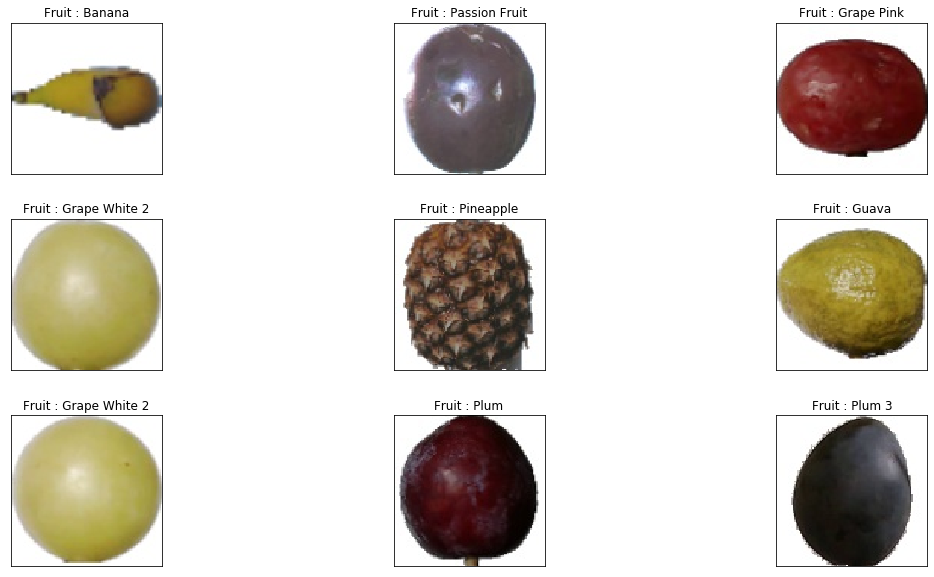

In [135]:
display_rand_images(images, labels, labeDict)


The data will be splited in 2 set called train and validation

In [136]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_val shape = ",x_val.shape)
print("y_test shape = ",y_val.shape)

x_train shape =  (8066, 227, 227, 3)
y_train shape =  (8066,)

x_val shape =  (2017, 227, 227, 3)
y_test shape =  (2017,)


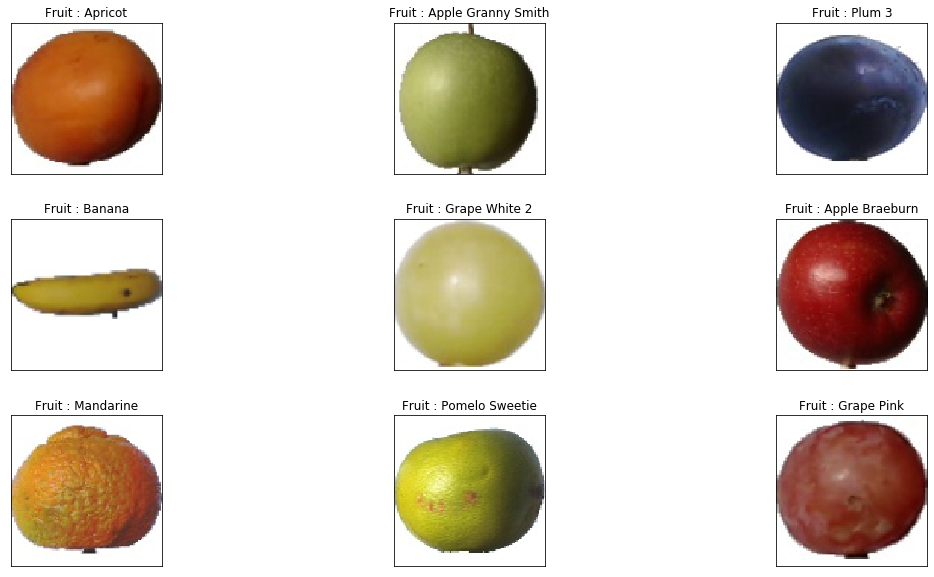

In [0]:
display_rand_images(x_train, y_train, labeDict)


## Build Alexnet Architecture

![s](ml22-01.png)

Input Layer: 224 x 224 x 3


In [137]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024

Use optimize alogrithm called adam, and metrics is accuracy

In [138]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


After tuning batch_size range from 32 to 256 the best one is 64 (cannot show in there be cause if i place two test tha ram is crashed)

The epochs is 10

In [139]:
%%time

from keras.callbacks import ModelCheckpoint

#model.fit(x_train, y_train, epochs=2)
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)
model.fit(x_train,y_train,
        batch_size = 64,
        epochs=10,
        validation_data=(x_val, y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8066 samples, validate on 2017 samples
Epoch 1/10
 - 15s - loss: 0.3839 - acc: 0.8740 - val_loss: 6.3285 - val_acc: 0.3550

Epoch 00001: val_loss improved from inf to 6.32853, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/10
 - 9s - loss: 0.3136 - acc: 0.8997 - val_loss: 1.0574 - val_acc: 0.7987

Epoch 00002: val_loss improved from 6.32853 to 1.05744, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/10
 - 9s - loss: 0.1020 - acc: 0.9650 - val_loss: 0.3181 - val_acc: 0.8969

Epoch 00003: val_loss improved from 1.05744 to 0.31812, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/10
 - 9s - loss: 0.1176 - acc: 0.9605 - val_loss: 2.1314 - val_acc: 0.7263

Epoch 00004: val_loss did not improve from 0.31812
Epoch 5/10
 - 9s - loss: 0.1698 - acc: 0.9446 - val_loss: 2.0208 - val_acc: 0.7898

Epoch 00005: val_loss did not improve from 0.31812
Epoch 6/10
 - 9s - loss: 0.0631 - 

**=>The accuracy for training set is 98.1% and 98.7% for validation test**

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('cnn_from_scratch_fruits.hdf5')

## Use Test Set to Evaluate The Model

Load the Test Set

In [141]:


categories_test = os.listdir(test_dir)
print("List of categories = ",categories_test,"\n\nNo. of categories = ", len(categories_test))


List of categories =  ['Strawberry', 'Nectarine', 'Apple Braeburn', 'Pomelo Sweetie', 'Apricot', 'Quince', 'Lemon Meyer', 'Passion Fruit', 'Banana', 'Pineapple', 'Grape Pink', 'Plum', 'Cauliflower', 'Kumquats', 'Grape White 2', 'Guava', 'Mandarine', 'Avocado', 'Plum 3', 'Apple Granny Smith', 'Grapefruit White', 'Ginger Root', 'Raspberry', 'Kohlrabi', 'Chestnut', 'Tangelo', 'Apple Crimson Snow', 'Peach', 'Eggplant', 'Tomato Yellow', 'Pitahaya Red', 'Cherry Wax Yellow', 'Strawberry Wedge', 'Plum 2', 'Potato White', 'Salak', 'Kiwi', 'Lemon', 'Apple Red Yellow 1', 'Pear Abate', 'Pear Monster', 'Tomato 3', 'Pepino', 'Limes', 'Cherry 1', 'Peach 2', 'Physalis', 'Pear Kaiser', 'Apple Red Yellow 2', 'Grape White 3', 'Tomato 4', 'Rambutan', 'Redcurrant', 'Potato Sweet', 'Dates', 'Potato Red', 'Pear Williams', 'Tamarillo', 'Peach Flat', 'Tomato Maroon', 'Onion Red', 'Cantaloupe 2', 'Tomato 2', 'Grape Blue', 'Mulberry', 'Papaya', 'Physalis with Husk', 'Cactus fruit', 'Grape White', 'Orange', 'Coco

In [0]:
images_test = 0
labels_test = 0

In [0]:
len(images_test)

TypeError: ignored

The total samples are 20622 and it has 120 classes

In [142]:
images_test, labels_test = load_images_and_labels(categories_test,test_dir,0)
print("No. of images loaded = ",len(images_test),"\nNo. of labels loaded = ",len(labels_test))
print(type(images_test),type(labels_test))

No. of images loaded =  20622 
No. of labels loaded =  20622
<class 'list'> <class 'list'>


In [171]:
dataDicTest = {}
for i in categories_test:
  dataDicTest.update({ i : len(os.listdir(test_dir+"/"+i)) })
dataDicTest


{'Apple Braeburn': 164,
 'Apple Crimson Snow': 148,
 'Apple Golden 1': 164,
 'Apple Golden 2': 164,
 'Apple Golden 3': 161,
 'Apple Granny Smith': 164,
 'Apple Pink Lady': 152,
 'Apple Red 1': 164,
 'Apple Red 2': 164,
 'Apple Red 3': 144,
 'Apple Red Delicious': 166,
 'Apple Red Yellow 1': 164,
 'Apple Red Yellow 2': 219,
 'Apricot': 164,
 'Avocado': 143,
 'Avocado ripe': 166,
 'Banana': 166,
 'Banana Lady Finger': 152,
 'Banana Red': 166,
 'Beetroot': 150,
 'Blueberry': 154,
 'Cactus fruit': 166,
 'Cantaloupe 1': 164,
 'Cantaloupe 2': 164,
 'Carambula': 166,
 'Cauliflower': 234,
 'Cherry 1': 164,
 'Cherry 2': 246,
 'Cherry Rainier': 246,
 'Cherry Wax Black': 164,
 'Cherry Wax Red': 164,
 'Cherry Wax Yellow': 164,
 'Chestnut': 153,
 'Clementine': 166,
 'Cocos': 166,
 'Dates': 166,
 'Eggplant': 156,
 'Ginger Root': 99,
 'Granadilla': 166,
 'Grape Blue': 328,
 'Grape Pink': 164,
 'Grape White': 166,
 'Grape White 2': 166,
 'Grape White 3': 164,
 'Grape White 4': 158,
 'Grapefruit Pink':

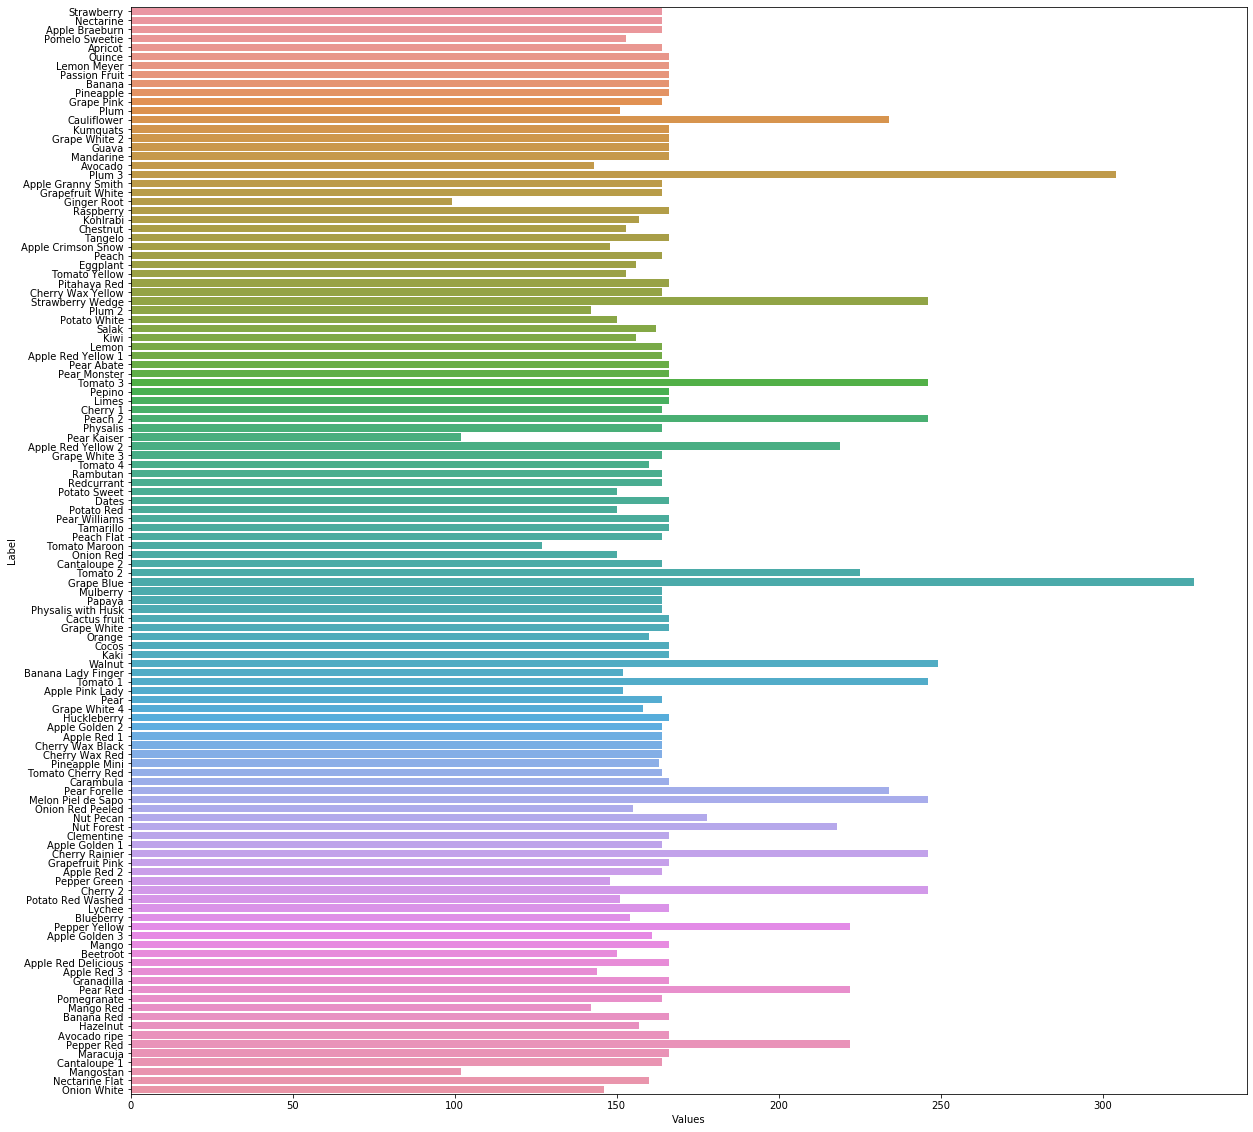

In [174]:
data  = pd.DataFrame( data = dataDicTest.keys(), columns=['Label'] )
data['Values'] = dataDicTest.values()
plt.figure(figsize=(20,20))
sns.barplot(x='Values', y= 'Label',data=data)


In [175]:
data[data['Values'] == data.Values.max()]

Label  Values
63  Grape Blue     328

In [176]:
data[data['Values'] == data.Values.min()]

Label  Values
21  Ginger Root      99

**From the graph, it illustrates that min in tes set is Ginger Root 99 images, while max is Grape Blue with 328**

test set also convert to 227x227 and choose number of images equal to validation set.

In [177]:
images_test = np.array(images_test)
labels_test = np.array(labels_test)

print("Images shape = ",images_test.shape,"\nLabels shape = ",labels_test.shape)
print(type(images_test),type(labels_test))

Images shape =  (20622, 227, 227, 3) 
Labels shape =  (20622,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [178]:
#get equally spaced numbers in a given range
n = np.arange(x_val.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 2014 2015 2016]

'n' values after shuffling =  [1555  526  393 ...  860 1459 1126]


In [179]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images_test = images_test[n]
labels_test = labels_test[n]

print("Images shape after shuffling = ",images_test.shape,"\nLabels shape after shuffling = ",labels_test.shape)

Images shape after shuffling =  (2017, 227, 227, 3) 
Labels shape after shuffling =  (2017,)


In [180]:
images_test = images_test.astype(np.float32)
labels_test = labels_test.astype(np.int32)
images_test = images_test/255
print("Images shape after normalization = ",images_test.shape)

Images shape after normalization =  (2017, 227, 227, 3)


In [181]:
print("images_test shape = ",images_test.shape)


images_test shape =  (2017, 227, 227, 3)


**The accuracy for the test set is 97%**

In [182]:
# evaluate and print test accuracy
score = model.evaluate(images_test, labels_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9766980664353


### Visualize test prediction

pred= 0
true= 0
pred= 7
true= 7
pred= 7
true= 7
pred= 6
true= 6
pred= 7
true= 7
pred= 7
true= 7
pred= 9
true= 9
pred= 11
true= 11
pred= 8
true= 8
pred= 6
true= 6
pred= 8
true= 8
pred= 8
true= 8
pred= 10
true= 10
pred= 3
true= 3
pred= 8
true= 8
pred= 8
true= 8


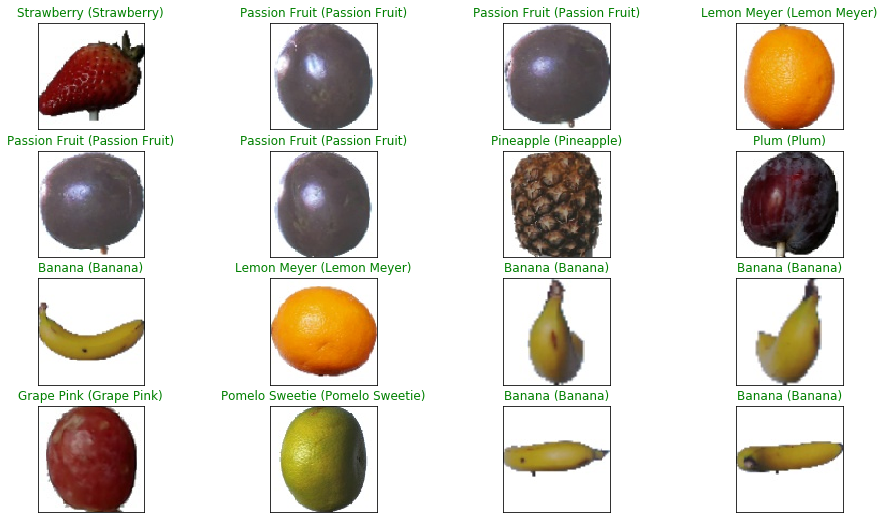

In [184]:
# Let's visualize test prediction.

y_pred = model.predict(images_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(images_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    print('pred=',pred_idx)
    true_idx = labels_test[idx]
    print('true=',true_idx)
    ax.set_title("{} ({})".format(labeDict[pred_idx], labeDict[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### Visualize with number

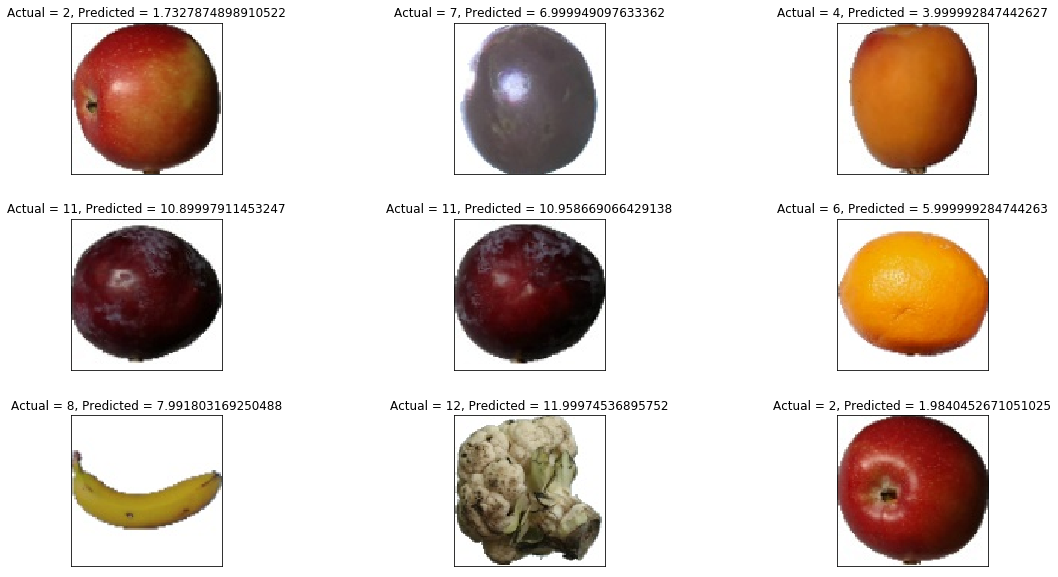

In [185]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, images_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(images_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(labels_test[r[0]] , labels_test[r[0]]*y_pred[r[0]][labels_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

### classification_report

In [0]:
y_pred_list = []
for i in range(y_pred.shape[0]):
  y_pred_list.append(np.argmax(y_pred[i]))

In [188]:
from sklearn.metrics import classification_report
result = classification_report(y_true=labels_test, y_pred=y_pred_list)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       164
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1.00       164
           5       0.92      1.00      0.96       166
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00       166
           8       1.00      0.91      0.95       166
           9       1.00      0.97      0.98       166
          10       1.00      1.00      1.00       164
          11       1.00      0.82      0.90       151
          12       0.93      1.00      0.96        63
          17       0.00      0.00      0.00         0

    accuracy                           0.98      2017
   macro avg       0.92      0.91      0.91      2017
weighted avg       0.99      0.98      0.98      2017



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [196]:
max(y_pred_list)

17

In [197]:
min(y_pred_list)


0

In [199]:
labels_test.max()

12

In [200]:
labels_test.min()

0

**=> the f1-score is for the class from 0 to 12 is very good which is nearly 1**

**=> However, the data is pick randomly so the max train set has 17 classes while max test set only 12 classes**

**=> That reason why class 17 is 0 for f1 score**

**=> The way the data is chosen randomly is worse (120 classes)**

## Conclusion

### Results

This project use CNN with Alexnet architecture. This model works very well with the **accuracy*:
    - 98.1% for training set 
    - 98.7% for validation => no overfit
    - 97.7% for test set => work with data unseen very well
    
The f1_score for all class nearly 1. 

### Problem

**Cannot load all the data because the ram is crashed in google colab.**

=> It leads to the data is pick randomly, so the max train set has 17 classes while max test set only 12 classes

=> That reason why class 17 is 0 for f1 score

=> The way the data is chosen randomly is worse (120 classes)